# PRACTICA CALIFICADA 3 - PATRICHS INOCENTE


## Pregunta 1

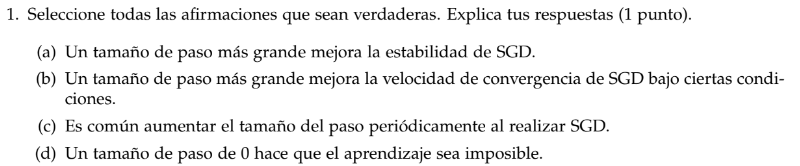

**Respuesta.** AFIRMACIONES VERDADERAS: (b),(d)

(a) FALSO. Por tratarse de un algoritmo de indole aleatorio, es impreciso saber si la dirección que esta tomando el algoritmo en una iteracion determinada es la dirección que minimiza globalmente a la función, por lo que mantener siempre un paso grande generará inestabilidad.

(b) VERDADERO.Un tamaño de paso de convergencia aporta velocidad a la convergencia, pero solo en etapas iniciales, la condicion sería reducir paulatinamente este paso a medida que avanzan las iteraciones.

(c) FALSO. En realidad se estila hacer lo contrario, reduciendo los pasos a medida que vamos acercandonos al minimo, todo esto para evitar que con pasos grandes sobrepasemos el minimo una y otra vez y por tanto caer en un bucle sin fin.

(d) VERDADERO. Exactamente, un tamaño de paso 0 indicaría que nos mantenemos en la misma posición dentro de la funcióón de perdida, debido a que el vector negativo de gradiente se multiplica por 0 una y otra vez.


## Pregunta 4

#### Las redes MLP son aproximadores de funciones universales. ¿Qué quiere decir esto? (1 punto).

**Respuesta.** Esto quiere decir que con MLP se puede aproximar cualquier función con la precisión que se desee, los perceptrones multicapa permite entre otras virtudes, absorver relaciones no lineales entre entradas debido a sus capas ocultas y funciones de activación intermedias que evitan que dos neuronas aprendan lo mismo.

## Pregunta 5

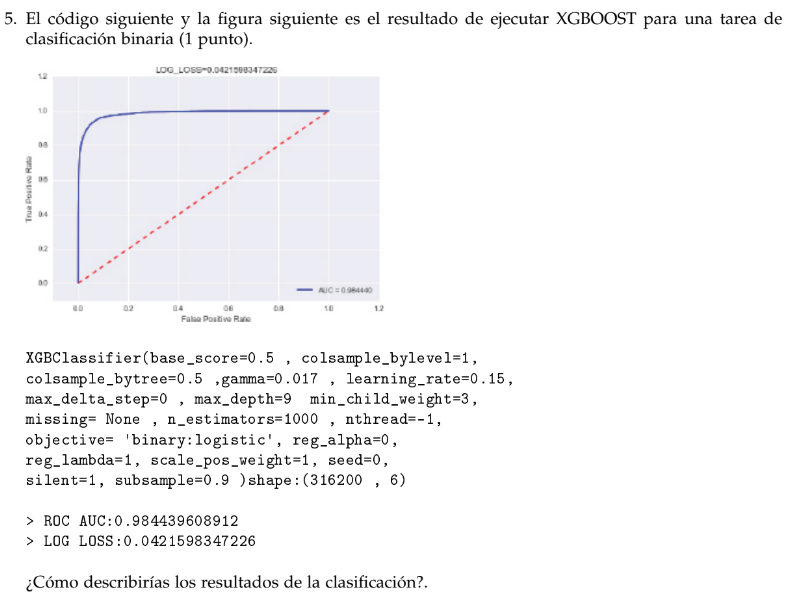

**Respuesta.** En primera instancia tenemos el analisis de la gráfica, para un espacio ROC la diagonal punteada refleja la puntuacion de un clasificador aleatorio donde la tasa de sacar verdaderos positivos y falsos positivos es la misma por lo que es la linea base para dividir modelos entre buenos  (arriba de la diagonal) y malos (abajo de la diagonal).

El modelo presentado en azul es el resultado que ha obtenido el modelo XGBOOST ,se puede apreciar que es un buen modelo ya que el ritmo al que obtiene verdaderos positivos es mucho mayor en contraparte con la obtencióón de falsos positivos, lo cual es lo que se espera de un exelente modelo. La Puntuación AUC es el área bajo la curva azul, por lo que un modelo seráá perfecto si se obtiene un AUC=1. En nuestro caso es muy próximo.
**Por lo que este modelo tiene una alta probabilidad de puntuar una instancia positiva elegida aleatoriamente como positiva en vez de negativa.**


La métrica de Log loss nos indica que tan lejos está cada predicción con respecto a la etiqueta real. Por lo que un valor de Log loss cercano a 0 nos indica que nuestro modelo tiene una gran precisión, como es el caso de este ejemplo.

## Pregunta 6

#### Tu amigo está entrenando un modelo de regresión logística para un problema de clasificación binaria utilizando la pérdida L2 para la optimización. Explíquele por qué es una mala elección y qué pérdida debería utilizar en su lugar (1 punto).

Respuesta. Es una mala elección ya que el modelo de regresión logistica usa como optimizador al algoritmo de descenso de gradiente, usar por tanto una perdida L2 en el contexto de aplicación a la función sigmoide generará una funcion de perdida no convexa y con minimos locales,el algoritmo de descenso de gradiente no funciona bien para funciones no convexas y las que tienen varios minimos locales, ya que se queda atascada posiblemente en un minimo local y evita avanzar con el aprendizaje sin alcanzar el minimo global. Se recomienda por tanto una funcion de perdida que en el contexto sigmoide sea convexa (un solo minimo), como es el caso de la funcion de perdida de entropia cruzada o tambien llamada perdida logística.

## Pregunta 9

### a) Propagación hacia adelante. 
Ahora, dado x1 = 1, x2 = −2, w11 = 6, w12 = 2, w21 = 4, w22 =
7, w31 = 5, w32 = 1 y los mismos valores para x1, x2 arriba, calcula los valores de los nodos
internos. Simplifica las fracciones.

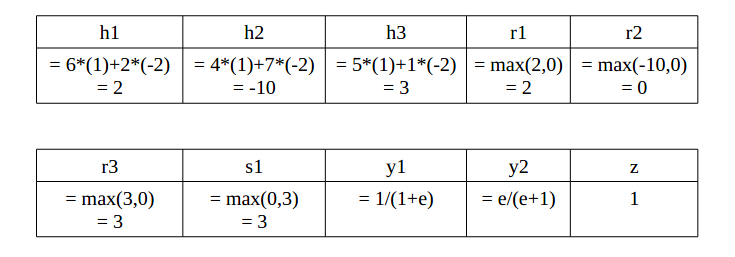

### c) Retropropagación. 
Calcula analíticamente los siguientes gradientes. La respuesta debe ser una
expresión de cualquiera de los nodos de la red (x1, x2, h1, h2, h3,r1,r2,r3,s1, y1, y2, z) o pesos
w11, w12, w21, w22, w31, w32

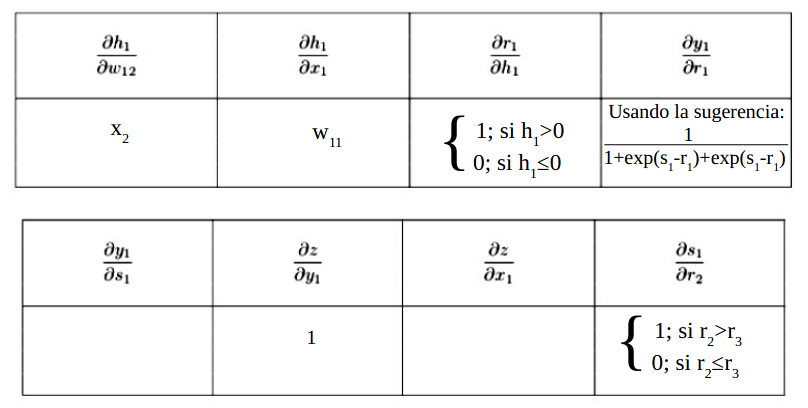

## Pregunta 10

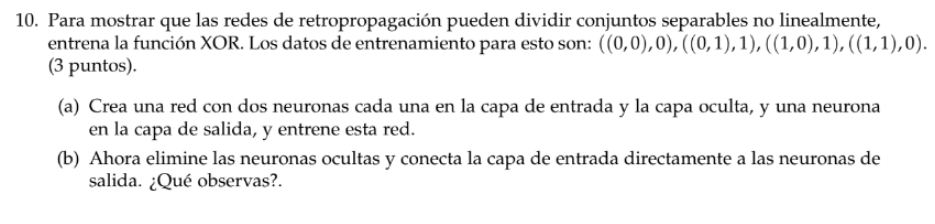

In [ ]:
!pip install -q -U watermark

In [ ]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch

Python implementation: CPython
Python version       : 3.7.10
IPython version      : 5.5.0

numpy : 1.19.5
pandas: 1.1.5
torch : 1.9.0+cu102



#### Funcion de visualización

In [ ]:
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
def ann_viz(model, view=True, filename="network.gv"):
    """Visualiza un modelo Sequential.

    # Argumentos
        model: Una instancia de un modelo de Keras.

        view: si si mostrar el modelo tras generación.

        filename: donde se guarda la visualization. (a .gv file)

        title: Titulo para el grafo
    """
    from graphviz import Digraph

    input_layer = 0
    hidden_layers_nr = 0
    layer_types = []
    hidden_layers = []
    output_layer = 0
    layers = [layer for layer in model.modules() if type(layer) == torch.nn.Linear]

    for layer in layers:
        if layer == layers[0]:
            input_layer = layer.in_features
            hidden_layers_nr += 1
            if type(layer) == torch.nn.Linear:                
                hidden_layers.append(layer.out_features)
                layer_types.append("Dense")
            else:
                raise Exception("Error de entrada")

        else:
            if layer == layers[-1]:
                output_layer = layer.out_features
            else:
                hidden_layers_nr += 1
                if type(layer) == torch.nn.Linear:

                    hidden_layers.append(layer.out_features)
                    layer_types.append("Dense")
                else:
                    raise Exception("Error oculto")
        last_layer_nodes = input_layer
        nodes_up = input_layer

    g = Digraph("g", filename=filename)
    n = 0
    g.graph_attr.update(splines="false", nodesep="0.5", ranksep="0", rankdir='LR')
    # Input Layer
    with g.subgraph(name="cluster_input") as c:
        if type(layers[0]) == torch.nn.Linear:
            the_label = "Capa de entrada"
            if layers[0].in_features > 10:
                the_label += " (+" + str(layers[0].in_features - 10) + ")"
                input_layer = 10
            c.attr(color="white")
            for i in range(0, input_layer):
                n += 1
                c.node(str(n))
                c.attr(labeljust="1")
                c.attr(label=the_label, labelloc="bottom")
                c.attr(rank="same")                
                c.node_attr.update(
                    width="0.65",
                    style="filled",                    
                    shape="circle",
                    color=HAPPY_COLORS_PALETTE[3],
                    fontcolor=HAPPY_COLORS_PALETTE[3],
                )
    for i in range(0, hidden_layers_nr):
        with g.subgraph(name="cluster_" + str(i + 1)) as c:
            if layer_types[i] == "Dense":
                c.attr(color="white")
                c.attr(rank="same")
                the_label = f'Capa oculta {i + 1}'
                if layers[i].out_features > 10:
                    the_label += " (+" + str(layers[i].out_features - 10) + ")"
                    hidden_layers[i] = 10
                c.attr(labeljust="right", labelloc="b", label=the_label)
                for j in range(0, hidden_layers[i]):
                    n += 1
                    c.node(
                        str(n),
                        width="0.65",
                        shape="circle",
                        style="filled",
                        color=HAPPY_COLORS_PALETTE[0],
                        fontcolor=HAPPY_COLORS_PALETTE[0],
                    )
                    for h in range(nodes_up - last_layer_nodes + 1, nodes_up + 1):
                        g.edge(str(h), str(n))
                last_layer_nodes = hidden_layers[i]
                nodes_up += hidden_layers[i]
            else:
                raise Exception("No se admite el tipo de capa oculta")

    with g.subgraph(name="cluster_output") as c:
        if type(layers[-1]) == torch.nn.Linear:
            c.attr(color="white")
            c.attr(rank="same")
            c.attr(labeljust="1")
            for i in range(1, output_layer + 1):
                n += 1
                c.node(
                    str(n),
                    width="0.65",
                    shape="circle",
                    style="filled",
                    color=HAPPY_COLORS_PALETTE[4],
                    fontcolor=HAPPY_COLORS_PALETTE[4],
                    
                )
                for h in range(nodes_up - last_layer_nodes + 1, nodes_up + 1):
                    g.edge(str(h), str(n))
            c.attr(label="Capa de salida", labelloc="bottom")
            c.node_attr.update(
                color="#2ecc71", style="filled", fontcolor="#2ecc71", shape="circle"
            )

    g.attr(arrowShape="none")
    g.edge_attr.update(arrowhead="none", color="#707070", penwidth="2")
    if view is True:
        g.view()

    return g


### a) Creación de Red (1 capa de entrada, 1 capa oculta, 1 capa de salida) y entrenamiento

In [ ]:
import torch
from torch.autograd import Variable
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import torch.nn.functional as F
from torch import nn, optim

In [ ]:
X = torch.Tensor([[0., 0.],[0., 1.],[1., 0.],[1., 1.]])
y = torch.Tensor([0., 1., 1., 0.])

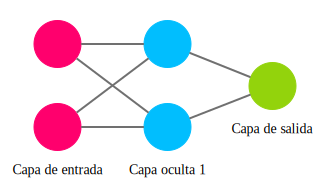

In [ ]:
class Net(nn.Module):

  def __init__(self, n_features):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(n_features, 2)
    self.fc2 = nn.Linear(2, 1)


  def forward(self, x):
    x = F.relu(self.fc1(x))
    return torch.sigmoid(self.fc2(x))

netModified = Net(2)

ann_viz(netModified, view=False)

In [ ]:
criterion = nn.BCELoss()
optimizador = optim.Adam(netModified.parameters(), lr=0.001)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
X = X.to(device)
y = y.to(device)
netModified = netModified.to(device)
criterion = criterion.to(device)

In [ ]:
def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)

for epoch in range(10000):
    
    y_pred = netModified(X)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y)
    
    if epoch % 1000 == 0:
      print(
f'''Epoca {epoch}
Conjunto de entrenamiento - perdida: {round_tensor(train_loss)}''')
    
    optimizador.zero_grad()
    train_loss.backward()
    optimizador.step()

Epoca 0
Conjunto de entrenamiento - perdida: 0.697
Epoca 1000
Conjunto de entrenamiento - perdida: 0.552
Epoca 2000
Conjunto de entrenamiento - perdida: 0.329
Epoca 3000
Conjunto de entrenamiento - perdida: 0.173
Epoca 4000
Conjunto de entrenamiento - perdida: 0.089
Epoca 5000
Conjunto de entrenamiento - perdida: 0.047
Epoca 6000
Conjunto de entrenamiento - perdida: 0.025
Epoca 7000
Conjunto de entrenamiento - perdida: 0.014
Epoca 8000
Conjunto de entrenamiento - perdida: 0.008
Epoca 9000
Conjunto de entrenamiento - perdida: 0.005


### Predicciones

In [ ]:
output = netModified(torch.tensor([0., 0.]))
print(output.round())

tensor([0.], grad_fn=<RoundBackward>)


In [ ]:
output = netModified(torch.tensor([0., 1.]))
print(output.round())

tensor([1.], grad_fn=<RoundBackward>)


In [ ]:
output = netModified(torch.tensor([1., 0.]))
print(output.round())

tensor([1.], grad_fn=<RoundBackward>)


In [ ]:
output = netModified(torch.tensor([1., 1.]))
print(output.round())

tensor([0.], grad_fn=<RoundBackward>)


### b) Entrenamiento de Red sin capa oculta

Como se observará a continuación la implementación de la red sin la capa oculta no aprende como queremos, esto debido a que la ausencia de una capa oculta y la conexion directa impide que la red absorva las interacciones entre nuestras entradas, por lo que la contribución de cada entrada hacia el valor de salida será independiente de las otras. Además recordar que la omisión de esta capa, eliminá las funciones de activacióón RELU las que justamente permiten capturar las relaciones no lineales entre entradas, caso que nos embarga ya que nuestros datos no son separables linealmente. 

In [ ]:
class Net_sin_capa_oculta(nn.Module):

  def __init__(self, n_features):
    super(Net_sin_capa_oculta, self).__init__()
    self.fc1 = nn.Linear(n_features, 1)
    
  def forward(self, x):
    return torch.sigmoid(self.fc1(x))

netModified_sin_capa_oculta = Net_sin_capa_oculta(2)

print(netModified_sin_capa_oculta)

Net_sin_capa_oculta(
  (fc1): Linear(in_features=2, out_features=1, bias=True)
)


In [ ]:
netModified_sin_capa_oculta = netModified_sin_capa_oculta.to(device)

In [ ]:
def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)

for epoch in range(10000):
    
    y_pred = netModified_sin_capa_oculta(X)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y)
    
    if epoch % 1000 == 0:
      print(
f'''Epoca {epoch}
Conjunto de entrenamiento - perdida: {round_tensor(train_loss)}''')
    
    optimizador.zero_grad()
    train_loss.backward()
    optimizador.step()

Epoca 0
Conjunto de entrenamiento - perdida: 0.796
Epoca 1000
Conjunto de entrenamiento - perdida: 0.796
Epoca 2000
Conjunto de entrenamiento - perdida: 0.796
Epoca 3000
Conjunto de entrenamiento - perdida: 0.796
Epoca 4000
Conjunto de entrenamiento - perdida: 0.796
Epoca 5000
Conjunto de entrenamiento - perdida: 0.796
Epoca 6000
Conjunto de entrenamiento - perdida: 0.796
Epoca 7000
Conjunto de entrenamiento - perdida: 0.796
Epoca 8000
Conjunto de entrenamiento - perdida: 0.796
Epoca 9000
Conjunto de entrenamiento - perdida: 0.796


### Predicciones No Prometedoras de Red Neuronal sin capa oculta

In [ ]:
output = netModified_sin_capa_oculta(torch.tensor([0., 0.]))
print(output.round())

tensor([1.], grad_fn=<RoundBackward>)


In [ ]:
output = netModified_sin_capa_oculta(torch.tensor([0., 1.]))
print(output.round())

tensor([1.], grad_fn=<RoundBackward>)


In [ ]:
output = netModified_sin_capa_oculta(torch.tensor([1., 0.]))
print(output.round())

tensor([1.], grad_fn=<RoundBackward>)


In [ ]:
output = netModified_sin_capa_oculta(torch.tensor([1., 1.]))
print(output.round())

tensor([1.], grad_fn=<RoundBackward>)
